In [35]:
import random 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [43]:
from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP

In [44]:
np.random.seed(1337)
random.seed(1337)

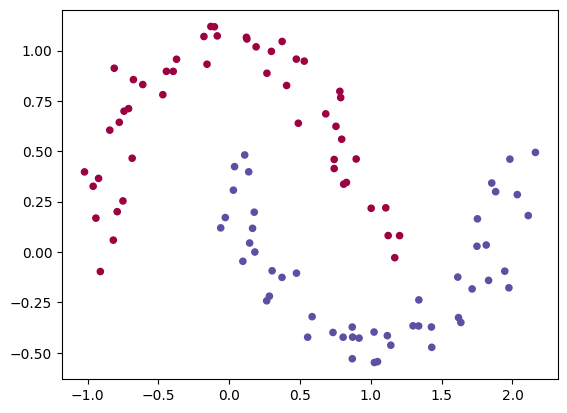

In [45]:
 # create train data
from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)
# X.shape ((100,2)), y.shape((100,)), y in {0,1}

y= y*2 -1 # y in {-1,1}
#visualize the data
plt.scatter(X[:,0], X[:,1], c=y,s=20, cmap=plt.cm.Spectral)



In [46]:
# initialize a model
model = MLP(2, [16, 16, 1]) # 2 inputs, 2 hidden layers of size 16, 1 output
print(model)
print(model.parameters())

[Value(data=0.23550571390294128), Value(data=0.06653114721000164), Value(data=-0.26830328150124894), Value(data=0.1715747078045431), Value(data=-0.6686254326224383), Value(data=0.6487474938152629), Value(data=-0.23259038277158273), Value(data=0.5792256498313748), Value(data=0.8434530197925192), Value(data=-0.3847332240409951), Value(data=0.9844941451716409), Value(data=-0.5901079958448365), Value(data=0.31255526637777775), Value(data=0.8246106857787521), Value(data=-0.7814232047574572), Value(data=0.6408752595662697), Value(data=-0.20252189189007108), Value(data=-0.8693137391598071), Value(data=0.39841666323128555), Value(data=-0.3037961142013801), Value(data=-0.19282493884310759), Value(data=0.6032250931493106), Value(data=0.6001302646227185), Value(data=0.32749776568749045), Value(data=0.6650130652363544), Value(data=0.1889136153241595), Value(data=-0.07813264062433589), Value(data=0.9151267732861252), Value(data=0.5914405264235476), Value(data=-0.3725442040076463), Value(data=0.3810

In [47]:
# see how ma
print(list(map(lambda x:x**2, [1,2,3])))


[1, 4, 9]


In [48]:
# Loss function
def loss(batch_size=None):
    # inline dataloader
    if batch_size is None:
        Xb, yb = X, y
    else :
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    
    inputs = [list(map(Value, xrow)) for xrow in Xb]
    # forward pass to get scores 
    scores = list(map(model,inputs))

    # loss
    losses = [(yp - Value(ygt))**2 for yp, ygt in zip(scores, yb)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p**2) for p in model.parameters())
    total_loss = data_loss + reg_loss

    # get accuracy 
    accuracy = [(yp.data > 0) == (ygt > 0) for yp, ygt in zip(scores, yb)]
    return total_loss, sum(accuracy) / len(accuracy)
total_loss, acc = loss()
print(total_loss, acc)

Value(data=1.0980204669338722) 0.68


In [52]:
# optimization 
for k in range(100):
    # forward pass
    total_loss, acc = loss()

    # zero grad
    for p in model.parameters():
        p.grad = 0.0
    # backward pass
    total_loss.backward()

    # update weights
    # learning rate decay
    learning_rate = 1.0 - 0.9 * k / 100
    for p in model.parameters():
        p.data -= learning_rate * p.grad

    if k % 1 == 0:
        print(f"epoch {k}: loss {total_loss.data}, accuracy {acc*100}%")

epoch 0: loss 1.0980204669338722, accuracy 68.0%
epoch 1: loss 1.9495232176296637, accuracy 50.0%
epoch 2: loss 0.8644883912265008, accuracy 76.0%
epoch 3: loss 0.7655503693737944, accuracy 79.0%
epoch 4: loss 0.6034251443344832, accuracy 83.0%
epoch 5: loss 0.3977270835876632, accuracy 88.0%
epoch 6: loss 0.3776133582313254, accuracy 84.0%
epoch 7: loss 0.5469433072147707, accuracy 83.0%
epoch 8: loss 0.25712346358906546, accuracy 92.0%
epoch 9: loss 0.17986036607847117, accuracy 94.0%
epoch 10: loss 0.44690434895857395, accuracy 87.0%
epoch 11: loss 0.16763730798070398, accuracy 94.0%
epoch 12: loss 0.25454824907363727, accuracy 91.0%
epoch 13: loss 0.7781389515182577, accuracy 79.0%
epoch 14: loss 0.6626524046874034, accuracy 82.0%
epoch 15: loss 0.37580147494196586, accuracy 89.0%
epoch 16: loss 0.244291545279297, accuracy 94.0%
epoch 17: loss 0.23595062907064346, accuracy 95.0%
epoch 18: loss 0.19303769612616295, accuracy 94.0%
epoch 19: loss 0.10128028826569513, accuracy 98.0%
ep

(-1.548639298268643, 1.951360701731357)

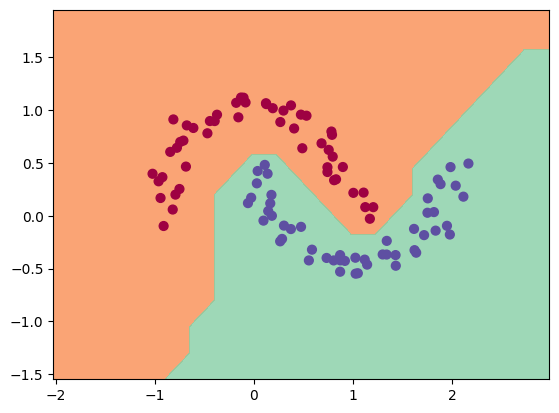

In [54]:
# visualize the decision boundary
h = 0.25 

x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())